# Taxi Data Analysis
This Python project delves into taxi data, exploring patterns and trends using Matplotlib and Seaborn for visualization.

Key Features:

- Data Analysis: Utilize Pandas to preprocess and analyze taxi datasets.
- Visualization: Employ Matplotlib and Seaborn to create insightful visualizations.
- Insight Generation: Explore taxi demand patterns, trip durations, and popular routes.
- Interactive Plots: Develop interactive plots to facilitate exploration and understanding.

This project offers a deep dive into taxi data, providing valuable insights for stakeholders in the transportation sector. 

0. Import the libraries matplotlib.pyplot, seaborn, and pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Taxis

Using the 'load_dataset' method from the 'seaborn' library, we will load the dataset for analysis. 
The dataset contains taxi trips in New York City in 2019. A detailed description can be found on the [website](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

First, we load the data.

In [2]:
df_taxi = sns.load_dataset('taxis')


1. Now we display:

 - The first 3 records from the dataset
 - Data types in the dataset df_taxi
 - Dimensions of the dataset

In [3]:
display(df_taxi.head(3))
display(df_taxi.dtypes)
display(df_taxi.shape)


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

(6433, 14)

2.Let's check if there are any missing values in this dataset.

In [4]:
df_taxi.isna().sum()


pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

The data might be missing due to various reasons such as data entry errors, malfunctioning sensors, or incomplete records.

Now we display the rows where the column with the most missing values is located.

In [5]:
na_dropoff_zone = df_taxi['dropoff_zone'].isna() 
na_rows = df_taxi[na_dropoff_zone]

display(na_rows)


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,1.74,17.0,4.26,0.00,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN
739,2019-03-14 00:09:17,2019-03-14 00:09:21,1,0.03,2.5,0.00,0.00,3.80,yellow,cash,Upper East Side South,NaN,Manhattan,NaN
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.00,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1108,2019-03-10 09:33:13,2019-03-10 09:52:04,1,13.40,52.0,11.70,5.76,70.26,yellow,credit card,NaN,NaN,NaN,NaN
1112,2019-03-12 19:09:23,2019-03-12 19:20:46,1,0.90,8.5,1.92,0.00,14.72,yellow,credit card,Times Sq/Theatre District,NaN,Manhattan,NaN
1230,2019-03-29 07:52:46,2019-03-29 08:02:40,1,0.90,5.5,1.76,0.00,10.56,yellow,credit card,Yorkville East,NaN,Manhattan,NaN
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.00,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1787,2019-03-28 06:58:57,2019-03-28 07:18:10,1,6.32,20.5,4.26,0.00,25.56,yellow,credit card,Manhattan Valley,NaN,Manhattan,NaN


In [6]:
# Highlight rows where data about the pickup zone is also missing

na_pickup_zone = na_rows['pickup_zone'].isna() 
na_both_zones = na_rows[na_pickup_zone]


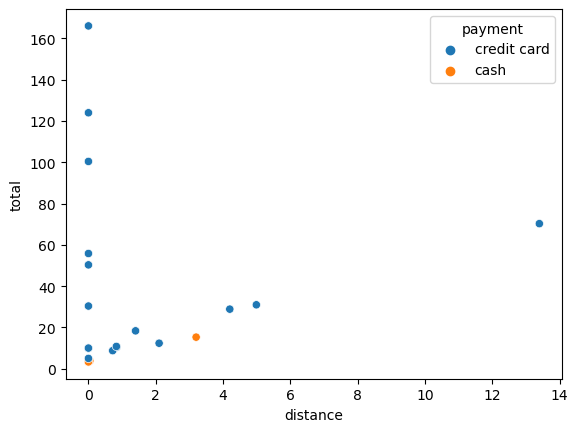

In [7]:
sns.scatterplot ( data = na_both_zones, x = 'distance', y = 'total', hue = 'payment');


It can be assumed that some data in multiple columns are missing due to trip cancellations, as the distance in some of them equals 0. Moreover, we observe that the majority of payments were made via cards, which could have occurred automatically upon cancellation. Additionally, there are missing data regarding both pickup and drop-off locations, yet the distance and fare are not zero. This suggests that the trip might have been hailed outside the app, and the payment was based solely on the meter.

In this context, it's reasonable to infer that missing data in certain columns are due to different scenarios related to trip cancellations and non-app-hailed rides, impacting the completeness of the dataset.

It can also be assumed that not every zone has a designated name in our functionality, and therefore, it simply isn't recorded in the data. This could lead to missing values in the pickup and drop-off location columns, especially if the ride originated or ended in an area without a specified name in our dataset.

3.Now we fill in the missing values with the string 'NA' in all collumns of the dataset.

In [8]:
df_taxi_clean = df_taxi.fillna('NA')


In [9]:
df_taxi_clean.isna().sum()


pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

4.We currently have the 'pickup' column containing data in datetime format. Let's remove the time and conducting analytics by day.

In [10]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')


Now, group the data by pickup_day and display a plot of total payments per day.

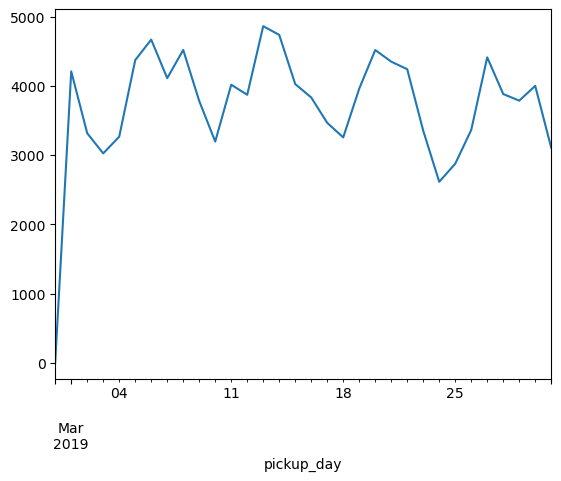

In [11]:
df_taxi_clean.groupby('pickup_day').total.sum().plot();


We observe that at the beginning of the plot, the total revenue is significantly lower compared to other days.

5.Display the number of rows for each pickup_day.

In [12]:
df_taxi_clean.pickup_day.value_counts()


pickup_day
2019-03-14    260
2019-03-06    257
2019-03-13    244
2019-03-01    241
2019-03-08    235
2019-03-20    233
2019-03-27    232
2019-03-22    229
2019-03-05    228
2019-03-21    221
2019-03-16    220
2019-03-12    218
2019-03-07    218
2019-03-30    215
2019-03-11    209
2019-03-29    209
2019-03-23    209
2019-03-28    205
2019-03-09    204
2019-03-15    201
2019-03-19    201
2019-03-02    198
2019-03-31    187
2019-03-10    185
2019-03-17    178
2019-03-26    178
2019-03-18    173
2019-03-04    171
2019-03-03    169
2019-03-25    155
2019-03-24    149
2019-02-28      1
Name: count, dtype: int64

We can see that there is only one row for the date 2019-02-28. This record appears to have been included here accidentally. Let's remove the row containing pickup_day equal to 2019-02-28 from the dataset df_taxi_clean. Then, display the plot of total payments per pickup_day again.

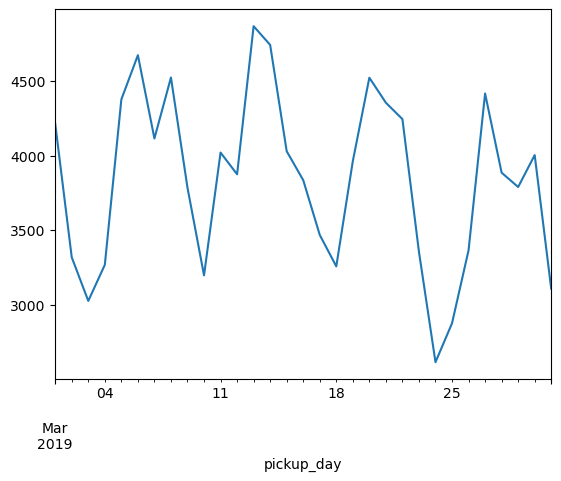

In [13]:
df_taxi_clean.drop(df_taxi_clean[df_taxi_clean['pickup_day'] =='2019-02-28'].index, inplace = True)
df_taxi_clean.groupby('pickup_day').total.sum().plot();


6.Let's look at the dynamics of total payments by boroughs. To do this, we create a pivot table based on df_taxi_clean, and exclude the column with pickup_borough values equal to NA.

In [14]:
borough_pivot = df_taxi_clean.pivot_table( index = 'pickup_day', columns = 'pickup_borough', values = 'total', aggfunc = sum )
borough_pivot.drop(columns = ['NA'], inplace = True )
borough_pivot


pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,123.42,353.05,3169.47,553.29
2019-03-02,NaN,146.56,2716.33,456.13
2019-03-03,80.75,407.06,2100.23,428.73
2019-03-04,92.00,188.73,2026.17,962.18
2019-03-05,98.16,558.40,2981.26,739.56
2019-03-06,130.65,198.53,3501.07,833.36
2019-03-07,NaN,440.75,3087.82,587.13
2019-03-08,79.20,237.47,3408.85,780.34
2019-03-09,80.22,187.88,2967.71,511.73


Next, let's construct a line plot to understand in which borough the highest daily taxi fare payments occur most frequently.

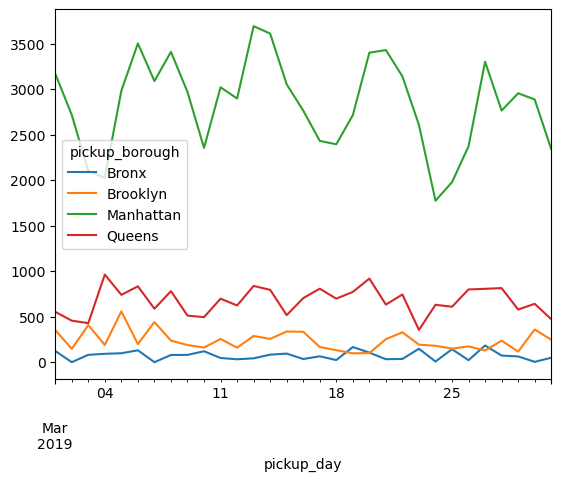

In [15]:
borough_pivot.fillna(0).plot();


The highest daily taxi fare payments most frequently occur in the Manhattan borough.

7.Let's display histograms of the total daily taxi fare payments for trips in each of the boroughs.

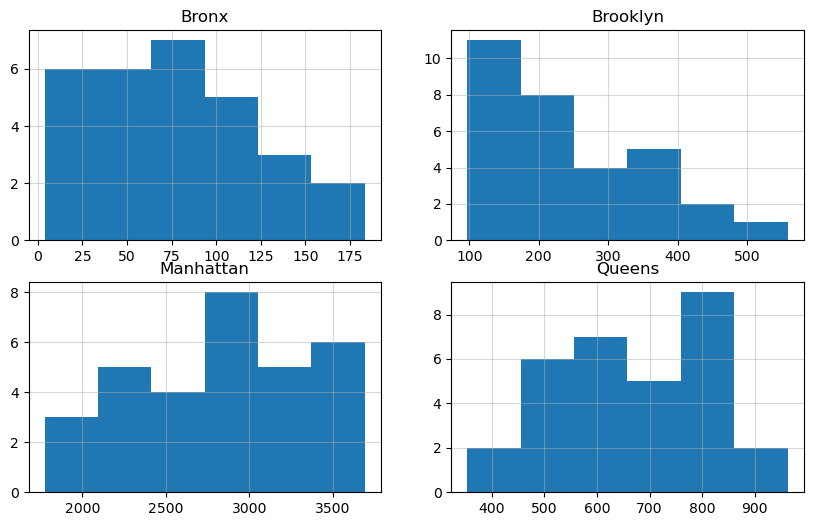

In [16]:
plt.figure( figsize = ( 10, 6 ))


plt.subplot( 2, 2, 1 )
plt.hist( borough_pivot['Bronx'], bins = 6 )
plt.title( 'Bronx' )
plt.grid(axis = 'both', alpha = .5)

plt.subplot( 2, 2, 2 )
plt.hist( borough_pivot['Brooklyn'], bins = 6 )
plt.title( 'Brooklyn' )
plt.grid(axis = 'both', alpha = .5)

plt.subplot( 2, 2, 3 )
plt.hist( borough_pivot['Manhattan'], bins = 6 )
plt.title( 'Manhattan' )
plt.grid(axis = 'both', alpha = .5)

plt.subplot( 2, 2, 4 )
plt.hist( borough_pivot['Queens'], bins = 6 )
plt.title( 'Queens' )
plt.grid(axis = 'both', alpha = .5);


8.Compare the distributions of daily fare payment amounts across boroughs.

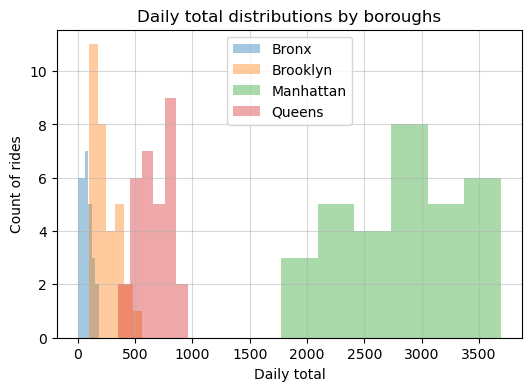

In [17]:
plt.figure( figsize = ( 6, 4 ))
for col in borough_pivot:
    plt.hist(borough_pivot[col], bins = 6, alpha = .4, label = col)
plt.grid(axis = 'both', alpha = .5)
plt.ylabel( 'Count of rides' )
plt.xlabel( 'Daily total' )
plt.title( 'Daily total distributions by boroughs')
plt.legend();


9.Using seaborn, display histograms of the total monthly payments by car color.

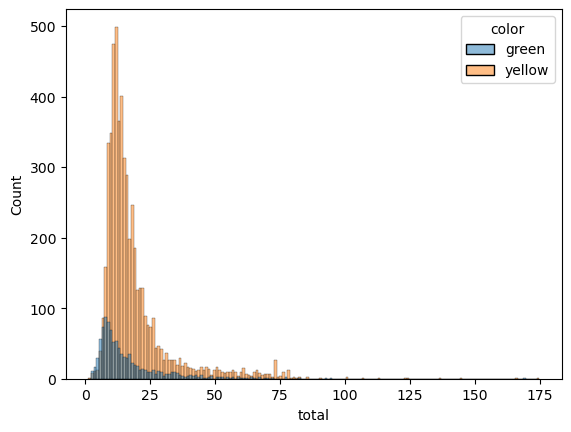

<Figure size 1000x500 with 0 Axes>

In [18]:
sns.histplot(x='total', hue='color', data=df_taxi_clean.sort_values('color'))
plt.figure( figsize = ( 10, 5 ), dpi = 100 );


10.Construct a scatter plot between trip distance and tip amount.

In [19]:
import warnings


In [20]:
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")


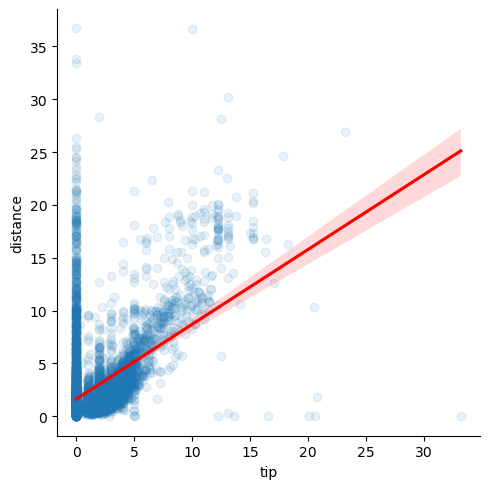

In [21]:
sns.lmplot( data = df_taxi_clean, x = 'tip', y = 'distance', scatter_kws={'alpha': 0.1}, line_kws = { 'color' : 'r'} );


A straight line passing through points, parallel to the axis where the trip distance is significant, indicates a significant number of trips where the tip amount equals 0.

11.Construct the daily dynamics of tips by the boroughs where passengers were picked up.

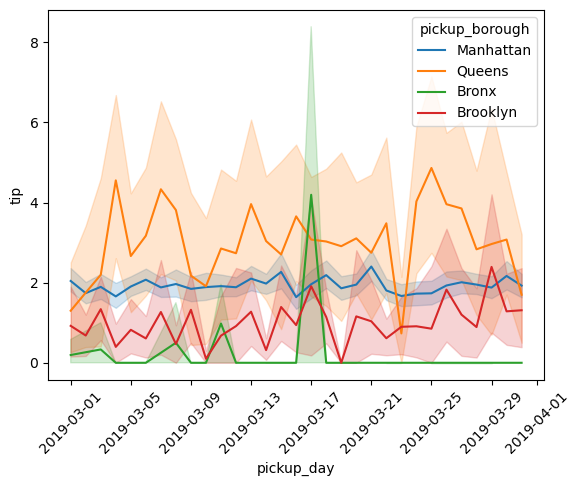

In [22]:
df_taxi_clean_borough = df_taxi_clean[ df_taxi_clean.pickup_borough != 'NA' ]

sns.lineplot( data = df_taxi_clean_borough, x = 'pickup_day', y = 'tip', hue = 'pickup_borough' )
plt.xticks( rotation = 45 );


The lowest average tip amount is in the Bronx, while the highest is in Queens. To confirm this, I used the code below. Manhattan exhibits the most stability.

In [23]:
df_taxi_clean_borough.groupby('pickup_borough').tip.mean()


pickup_borough
Bronx        0.148586
Brooklyn     0.966345
Manhattan    1.939550
Queens       3.044695
Name: tip, dtype: float64

12.Construct a box plot of tip amounts by the starting borough of the trip.

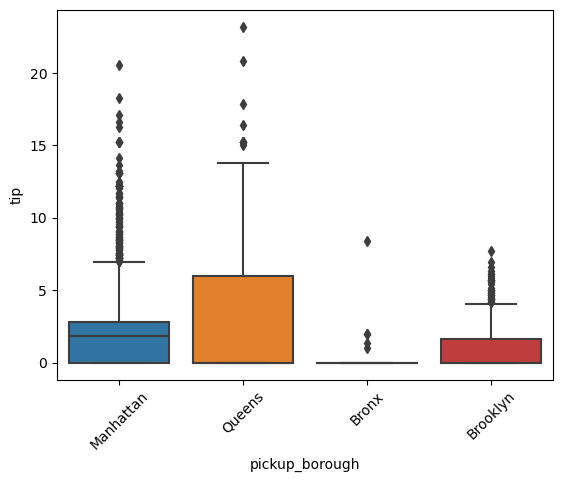

In [24]:
sns.boxplot( data = df_taxi_clean_borough, x = 'pickup_borough', y = 'tip' )
plt.xticks( rotation = 45 );


13.Let's examine the number of trips hourly.

In [25]:
# Define a function to extract the hour from a timestamp
def hr_func(ts):
    return ts.hour

# Apply the function to extract the hour from the 'pickup' column and create a new column 'pickup_time'
df_taxi_clean['pickup_time'] = df_taxi_clean.pickup.apply(hr_func)

df_taxi_clean


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_day,pickup_time
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23,20
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019-03-04,16
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019-03-27,17
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019-03-10,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019-03-30,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,2019-03-31,9
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,2019-03-31,17
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,2019-03-23,22
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,2019-03-04,10


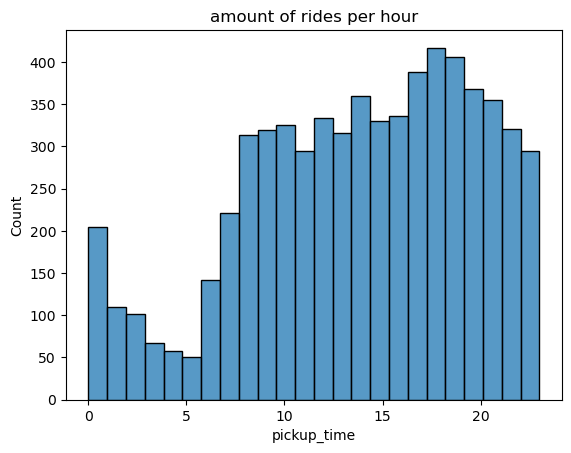

In [26]:
# Plot a histogram of the number of rides per hour
sns.histplot( data = df_taxi_clean, x = 'pickup_time')
plt.title( 'amount of rides per hour' );


We observe that the highest number of trips occurs between 17:00 and 19:00.

14.Take a look at the relationship between tip amount and the hour of trip initiation.

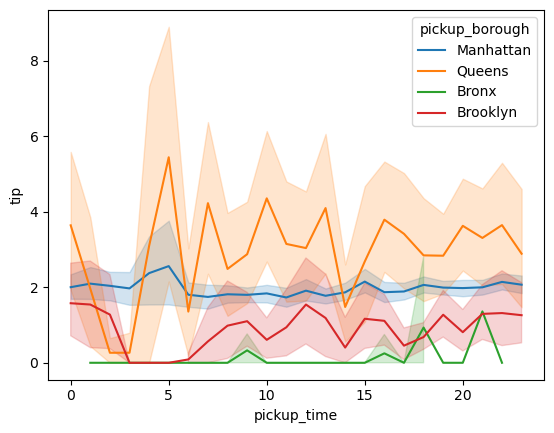

In [27]:
df_taxi_clean_borough = df_taxi_clean[ df_taxi_clean.pickup_borough != 'NA' ]
sns.lineplot( data = df_taxi_clean_borough, x = 'pickup_time', y = 'tip', hue = 'pickup_borough' );


In the Manhattan and Queens boroughs, the tip amount tends to be higher around 5:00 AM, while in the Bronx borough, it peaks around 9:00 PM.

In conclusion, this Taxi Data Analysis offers a comprehensive analysis of taxi data, leveraging the power of Pandas for data preprocessing and analysis, as well as Matplotlib and Seaborn for visualization. Through this project, valuable insights are gained into taxi demand patterns, trip durations, and popular routes. The use of interactive plots further enhances exploration and understanding of the data. Overall, this project provides stakeholders in the transportation sector with actionable insights that can inform decision-making and improve operational efficiency.